# Forecasting Coca-Cola Dataset using various models 

In [1]:
import pandas as pd

In [2]:
cola=pd.read_excel("C:\\Users\Hi\\Desktop\\Python Datasets\\CocaCola_Sales_Rawdata.xlsx")

In [3]:
cola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
cola[['Quarters','Year']]=cola['Quarter'].str.split(pat='_',expand=True)


In [5]:
cola.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


In [6]:
cola=pd.get_dummies(data=cola,columns=['Quarters'])
cola.head()

,Quarter,Sales,Year,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4
0,Q1_86,1734.827000,86,1,0,0,0
1,Q2_86,2244.960999,86,0,1,0,0
2,Q3_86,2533.804993,86,0,0,1,0
3,Q4_86,2154.962997,86,0,0,0,1
4,Q1_87,1547.818996,87,1,0,0,0


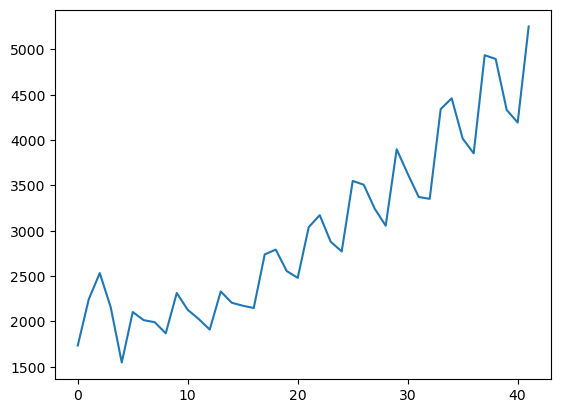

In [7]:
#Line Plot
import matplotlib.pyplot as plt
cola['Sales'].plot()
plt.show()

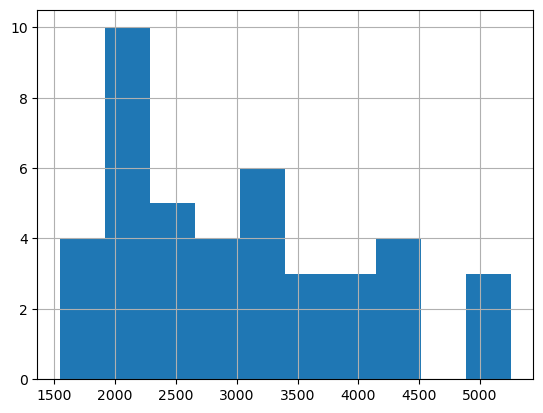

In [8]:
#Histogram Plot
cola['Sales'].hist()
plt.show()

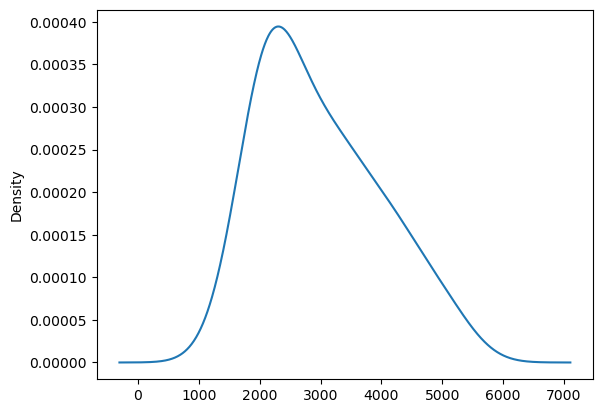

In [9]:
#Density Plot
cola['Sales'].plot(kind='kde')
plt.show()

<AxesSubplot:>

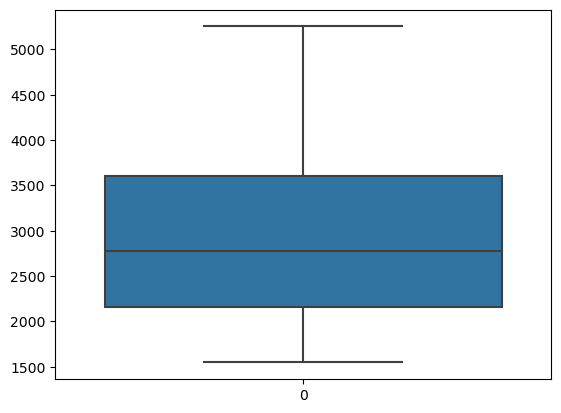

In [10]:
#Box Plot
import seaborn as sns
sns.boxplot(cola['Sales'])

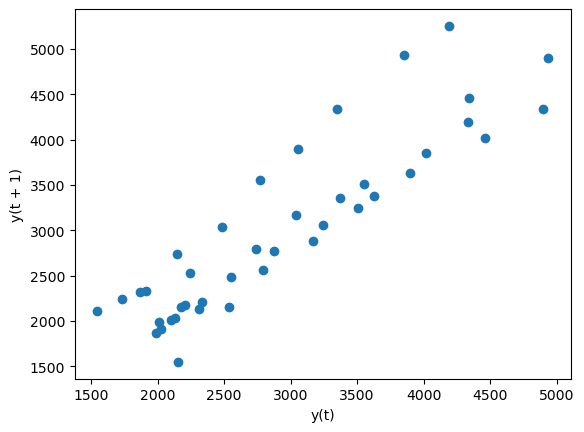

In [11]:
#Lag Plot
from pandas.plotting import lag_plot
lag_plot(cola['Sales'])
plt.show()

In [12]:
cola.shape

(42, 7)

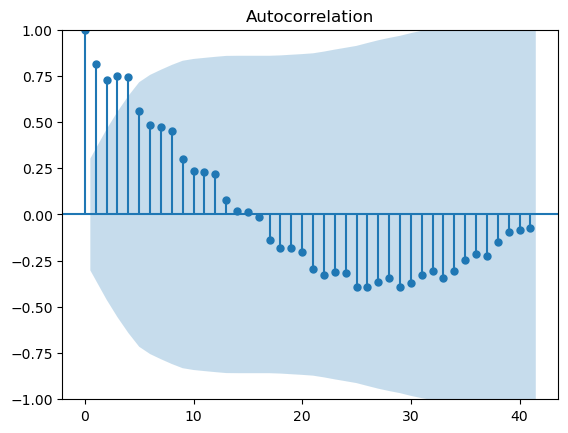

In [13]:
#AutoCorrelation Function ACF PLOT
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(cola['Sales'],lags=41)
plt.show()


# We are Going to use Model Based Methods here

In [14]:
#cola=pd.read_excel("C:\\Users\Hi\\Desktop\\Python Datasets\\CocaCola_Sales_Rawdata.xlsx")

In [15]:
#Splitting Dataset
train=cola.head(30)
test=cola.tail(12)

In [16]:
cola.head()

,Quarter,Sales,Year,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4
0,Q1_86,1734.827000,86,1,0,0,0
1,Q2_86,2244.960999,86,0,1,0,0
2,Q3_86,2533.804993,86,0,0,1,0
3,Q4_86,2154.962997,86,0,0,0,1
4,Q1_87,1547.818996,87,1,0,0,0


In [17]:
cola[['Quarters','Year']]=cola['Quarter'].str.split(pat='_',expand=True)


In [18]:
cola.head()

,Quarter,Sales,Year,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4,Quarters
0,Q1_86,1734.827000,86,1,0,0,0,Q1
1,Q2_86,2244.960999,86,0,1,0,0,Q2
2,Q3_86,2533.804993,86,0,0,1,0,Q3
3,Q4_86,2154.962997,86,0,0,0,1,Q4
4,Q1_87,1547.818996,87,1,0,0,0,Q1


<AxesSubplot:xlabel='Year', ylabel='Sales'>

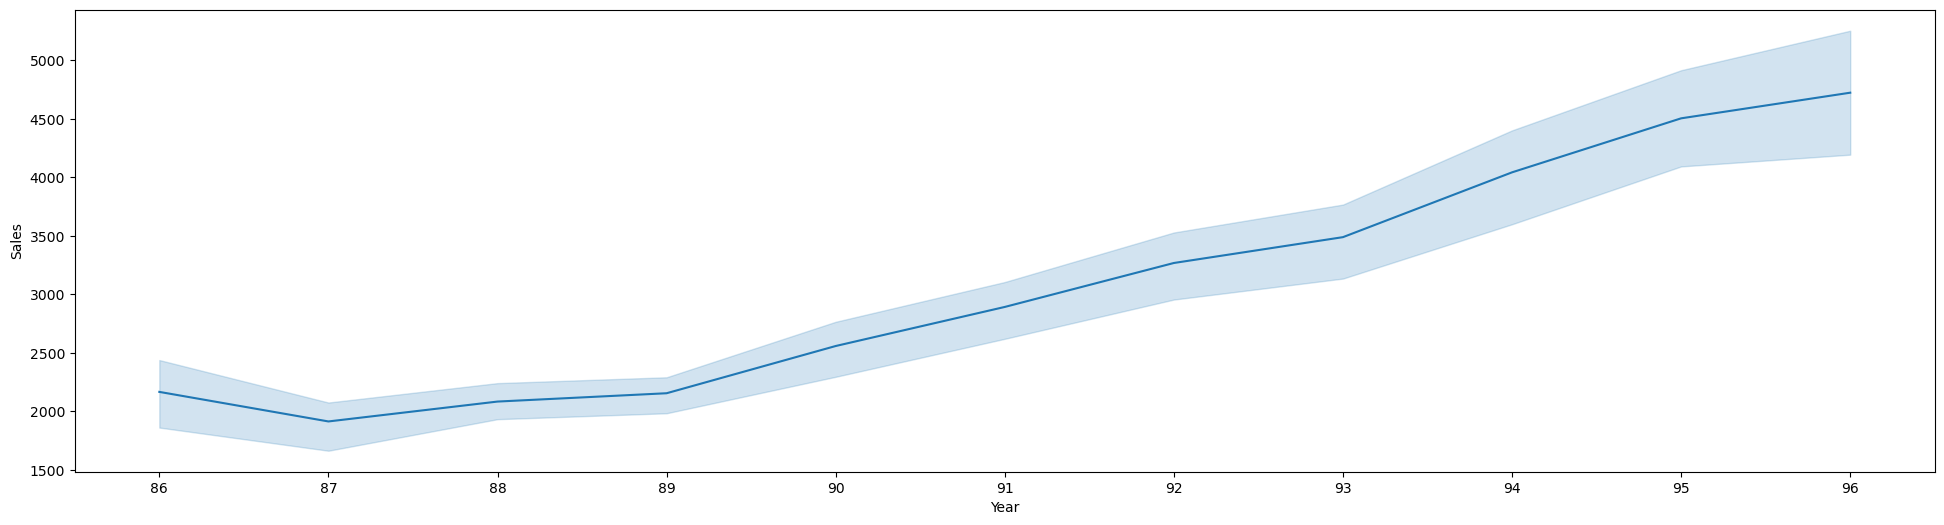

In [19]:
plt.figure(figsize=(24,6)) #we are taking ASPECT RATIO=0.25
sns.lineplot(x='Year',y='Sales',data=cola)

## Linear Model

In [20]:
import numpy as np
cola['t']=np.arange(len(cola))
train=cola.head(30)
test=cola.tail(12)

In [21]:
import statsmodels.formula.api as smf
linear_model=smf.ols('Sales~t',data=train).fit()
predict_linear=pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear=np.sqrt(np.mean(np.array(test['Sales']-np.array(predict_linear))**2))
rmse_linear

714.0144483281309

## Exponential model

In [22]:
cola['log_Sales']=np.log(cola['Sales'])
cola.head()

,Quarter,Sales,Year,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4,Quarters,t,log_Sales
0,Q1_86,1734.827000,86,1,0,0,0,Q1,0,7.458663
1,Q2_86,2244.960999,86,0,1,0,0,Q2,1,7.716443
2,Q3_86,2533.804993,86,0,0,1,0,Q3,2,7.837477
3,Q4_86,2154.962997,86,0,0,0,1,Q4,3,7.675529
4,Q1_87,1547.818996,87,1,0,0,0,Q1,4,7.344602


In [23]:
train=cola.head(30)
test=cola.tail(12)

In [24]:
expo_model=smf.ols('log_Sales~t',data=train).fit()
predict_expo=pd.Series(expo_model.predict(pd.DataFrame(test['t'])))
rmse_expo=np.sqrt(np.mean(np.array(test['log_Sales'])-np.array(predict_expo))**2)
rmse_expo

0.082171110560416

## Quadratic Model

In [25]:
cola['t_square']=np.square(cola['t'])
cola.head()

,Quarter,Sales,Year,Quarters_Q1,Quarters_Q2,Quarters_Q3,Quarters_Q4,Quarters,t,log_Sales,t_square
0,Q1_86,1734.827000,86,1,0,0,0,Q1,0,7.458663,0
1,Q2_86,2244.960999,86,0,1,0,0,Q2,1,7.716443,1
2,Q3_86,2533.804993,86,0,0,1,0,Q3,2,7.837477,4
3,Q4_86,2154.962997,86,0,0,0,1,Q4,3,7.675529,9
4,Q1_87,1547.818996,87,1,0,0,0,Q1,4,7.344602,16


In [26]:
train=cola.head(30)
test=cola.tail(12)

In [27]:
quad_model=smf.ols('Sales~t+t_square',data=train).fit()
predict_quad=pd.Series(quad_model.predict(pd.DataFrame(test[['t','t_square']])))
rmse_quad=np.sqrt(np.mean(np.array(test['Sales'])-np.array(predict_quad))**2)
rmse_quad

487.74479926129476

## Additive Seasonality


In [28]:
cola['Q1']=cola['Quarters_Q1']
cola['Q2']=cola['Quarters_Q2']
cola['Q3']=cola['Quarters_Q3']
cola['Q4']=cola['Quarters_Q4']

In [29]:
train=cola.head(65)
test=cola.tail(31)

In [30]:
ads_model=smf.ols('Sales~Q1+Q2+Q3+Q4',data=train).fit()
predict_ads=pd.Series(ads_model.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
rmse_ads=np.sqrt(np.mean(np.array(test['Sales'])-np.array(predict_ads))**2)
rmse_ads

336.2885574788278

## Additive Seasonality Quadratic

In [31]:
ads_quad_model=smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
predict_ads_quad=pd.Series(ads_quad_model.predict(pd.DataFrame(test[['t','t_square','Q1','Q2','Q3','Q4']])))
rmse_ads_quad=np.sqrt(np.mean(np.array(test['Sales'])-np.array(predict_ads_quad))**2)
rmse_ads_quad

0.17289797624005498

## Multiplicative Seasonality

In [32]:
mul_sea_model=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train).fit()
predict_mul_sea=pd.Series(mul_sea_model.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_mul_sea=np.sqrt(np.mean(np.array(test['log_Sales'])-np.array(np.exp(predict_mul_sea)))**2)
rmse_mul_sea

2847.5047092471295

## Multiplicative Additive Seasonality

In [33]:
mul_add_sea_model=smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
predict_mul_add_sea=pd.Series(mul_add_sea_model.predict(test[['t','Q1','Q2','Q3','Q4']]))
rmse_mul_add_sea=np.sqrt(np.mean(np.array(test['log_Sales'])-np.array(np.exp(predict_mul_add_sea)))**2)
rmse_mul_add_sea

3330.084916215264

In [34]:
from tabulate import tabulate
table=[['Model','RMSE_Values'],['LINEAR',rmse_linear],['EXPONENTIAL',rmse_expo],['QUADRATIC',rmse_quad],['ADDITIVE SEASONALITY',rmse_ads],
['ADDITIVE SEASONALITY QUADRATIC',rmse_ads_quad],['MULTIPLICATIVE SEASONALITY',rmse_mul_sea],['MULTIPLICATIVE ADDITIVE SEASONALITY',rmse_mul_add_sea]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════════════════════╤═══════════════╕
│ Model                               │   RMSE_Values │
╞═════════════════════════════════════╪═══════════════╡
│ LINEAR                              │   714.014     │
├─────────────────────────────────────┼───────────────┤
│ EXPONENTIAL                         │     0.0821711 │
├─────────────────────────────────────┼───────────────┤
│ QUADRATIC                           │   487.745     │
├─────────────────────────────────────┼───────────────┤
│ ADDITIVE SEASONALITY                │   336.289     │
├─────────────────────────────────────┼───────────────┤
│ ADDITIVE SEASONALITY QUADRATIC      │     0.172898  │
├─────────────────────────────────────┼───────────────┤
│ MULTIPLICATIVE SEASONALITY          │  2847.5       │
├─────────────────────────────────────┼───────────────┤
│ MULTIPLICATIVE ADDITIVE SEASONALITY │  3330.08      │
╘═════════════════════════════════════╧═══════════════╛


# Exponential model has the lowest RMSE value

<AxesSubplot:>

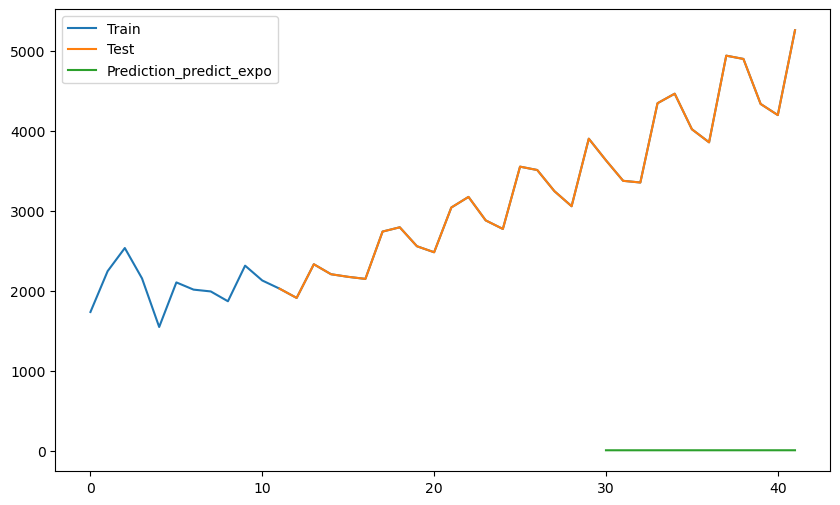

In [35]:
train.Sales.plot(legend=True,label='Train',figsize=(10,6))
test.Sales.plot(legend=True,label='Test')
predict_expo.plot(legend=True,label='Prediction_predict_expo')

# Data Driven Models

## Moving Average

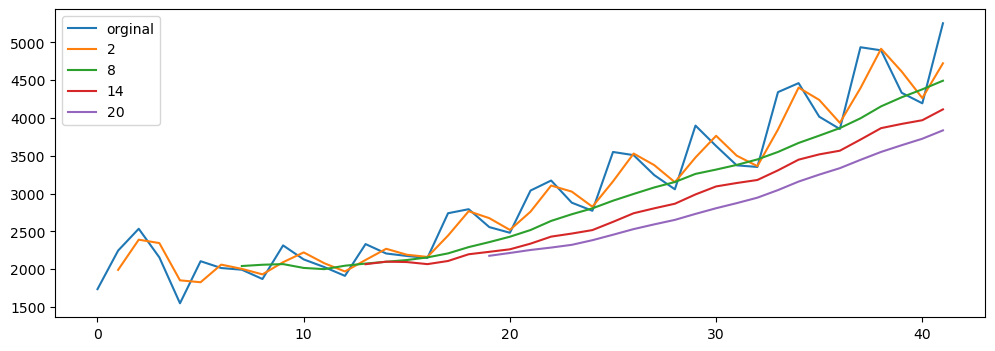

In [36]:
plt.figure(figsize=(12,4))
cola.Sales.plot(label='orginal')
for i in range(2,26,6):
    cola['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

## Time Series Decomposition Plot


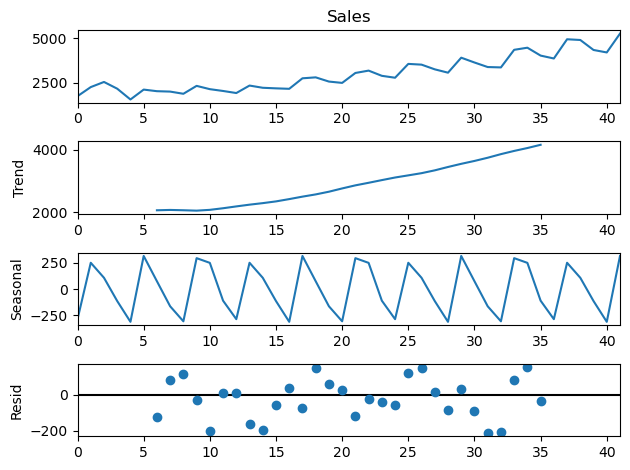

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_add_sea=seasonal_decompose(cola.Sales,period=12)
decompose_add_sea.plot()
plt.show()

## AutoCorrelation Function (ACF) plot and Partial AutoCorrection Function (PACF) Plot


c:\Users\Hi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


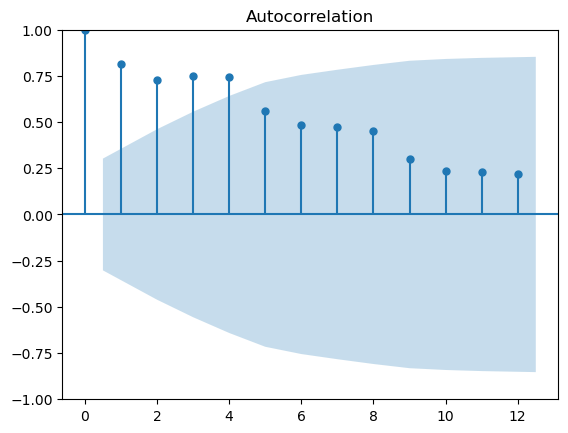

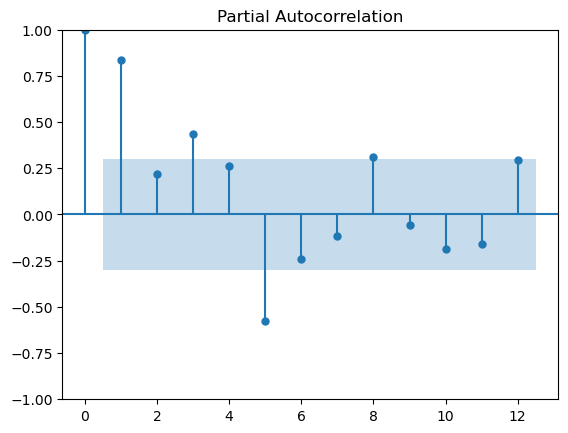

In [38]:
import statsmodels.graphics.tsaplots as tsaplots
tsaplots.plot_acf(cola.Sales,lags=12)
tsaplots.plot_pacf(cola.Sales,lags=12)
plt.show()

### Evaluation Metric MAPE

In [39]:
def MAPE(pred,org):
    temp=np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method


In [40]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
ses_model=SimpleExpSmoothing(train['Sales']).fit(smoothing_level=0.2)
pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_ses,test['Sales'])

10.857696718002723

### Holt method 

In [41]:
from statsmodels.tsa.holtwinters import Holt
holt_model=Holt(train['Sales']).fit(smoothing_level=0.8,smoothing_trend=0.2)
pred_holt=holt_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_holt,test['Sales'])

10.736135995470018

### Holts winter exponential smoothing with additive seasonality and additive trend


In [42]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
exp_smt_model=ExponentialSmoothing(train['Sales'],seasonal='add',trend='add',seasonal_periods=12).fit()
pred_exp_smt=exp_smt_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_exp_smt,test['Sales'])

4.5123679125148355

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [43]:
exp_smt_mul_model=ExponentialSmoothing(train['Sales'],seasonal='mul',trend='add',seasonal_periods=12).fit()
pred_exp_smt_mul=exp_smt_mul_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_exp_smt_mul,test['Sales'])

2.4387893126655813

# In Data Driven Models we have lowest MAPE value for HOLTS WINTER EXPONENTIAL SMOOTHING WITH MULTIPLICATIVE SEASONALITY AND ADDITIVE TREND

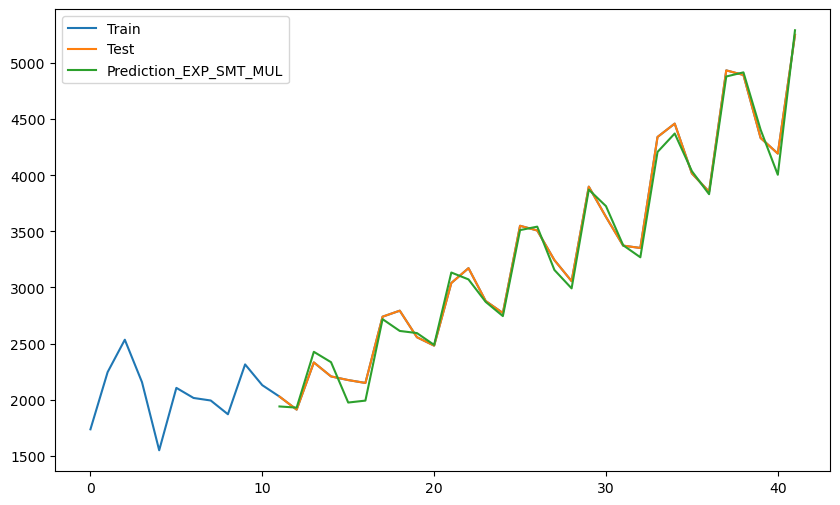

In [44]:
train.Sales.plot(legend=True,label='Train',figsize=(10,6))
test.Sales.plot(legend=True,label='Test')
pred_exp_smt_mul.plot(legend=True,label='Prediction_EXP_SMT_MUL')
plt.show()

# Base Model

In [45]:
cola=pd.read_excel("C:\\Users\Hi\\Desktop\\Python Datasets\\CocaCola_Sales_Rawdata.xlsx") #,header=0, index_col=0)

In [46]:
cola[['Quarters','Year']]=cola['Quarter'].str.split(pat='_',expand=True)
cola=cola.drop(['Quarter','Quarters'],axis=1)
cola.head()

,Sales,Year
0,1734.827000,86
1,2244.960999,86
2,2533.804993,86
3,2154.962997,86
4,1547.818996,87


In [47]:
cola=cola.set_index('Year')

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#cola.Quarters=le.fit_transform(cola.Quarters)

In [49]:
# separate out a validation dataset
split_point = len(cola) - 10
dataset, validation = cola[0:split_point], cola[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset_cola.csv', header=False)
validation.to_csv('validation_cola.csv', header=False)

Dataset 32, Validation 10


In [50]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset_cola.csv', header=0, index_col=0, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

C:\Users\Hi\AppData\Local\Temp\ipykernel_9880\1577559642.py:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train = read_csv('dataset_cola.csv', header=0, index_col=0, squeeze=True)


In [51]:
train=cola.head(30)
test=cola.tail(12)

# ARIMA Hyperparameter Tuning

In [52]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
#p_values=range(0,8)
#d_values=range(0,3)
#q_values=range(0,5)

In [53]:
from pmdarima import auto_arima #taking m=4 because we have 4 Quarters in an year 
auto_arima(train,m=4,start_P=0 , seasonal=True,  d=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True )

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,1,1)[4]             : AIC=inf, Time=0.52 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=330.970, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=334.635, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=334.416, Time=0.07 sec
 ARIMA(0,1,0)(1,1,0)[4]             : AIC=332.788, Time=0.03 sec
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=332.780, Time=0.06 sec
 ARIMA(0,1,0)(1,1,1)[4]             : AIC=334.524, Time=0.17 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=332.849, Time=0.04 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=332.696, Time=0.04 sec
 ARIMA(1,1,1)(0,1,0)[4]             : AIC=332.764, Time=0.11 sec
 ARIMA(0,1,0)(0,1,0)[4] intercept   : AIC=332.589, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,1,0)[4]          
Total fit time: 1.173 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 1, 0, 4),
      suppress_warnings=True, with_intercept=False)

In [54]:
#model = ARIMA(cola, order=(0,1,0))
#model_fit = model.fit()
model=ARIMA(train,order=(0,1,0)).fit()

In [55]:
pred=model.predict(start=len(train),end=(len(cola)-1))

In [56]:
from sklearn.metrics import mean_squared_error
rmse_arima=np.sqrt(mean_squared_error(test,pred))
rmse_arima

667.8890252130215

<AxesSubplot:xlabel='Year'>

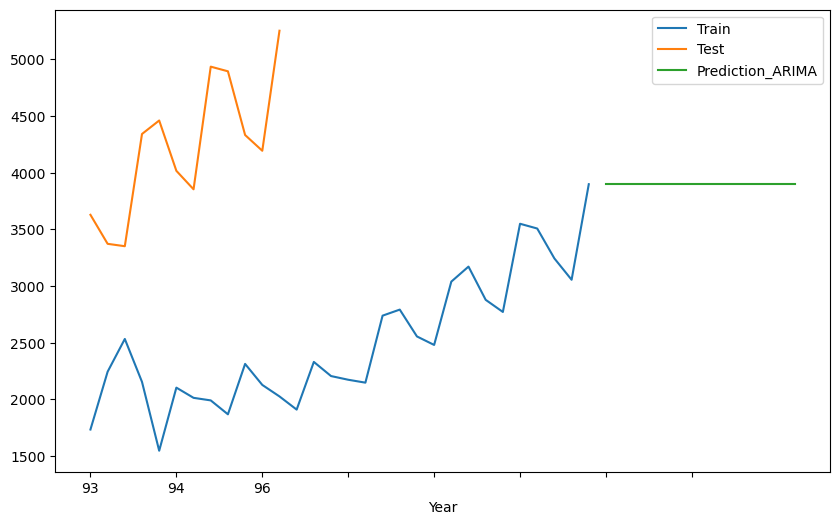

In [57]:
train.Sales.plot(legend=True,label='Train',figsize=(10,6))
test.Sales.plot(legend=True,label='Test')
pred.plot(legend=True,label='Prediction_ARIMA')